In [21]:
%reload_ext autoreload
%autoreload 2
import h5py as h5
import aftpy.aftmap as aft
file1 = "/Users/bjha/Data/AFT/AFTfarmaps/v2_300_10/2020/01/AFTmap_20200101_0000.h5"
file2 = "/Users/bjha/Downloads/AFTmap_20100502_0000.h5"

aftmap1 = aft.AFTmap(file1)
aftmap2 = aft.AFTmap(file2)

aftdata = aft.AFTload(path="/Users/bjha/Data/AFT/AFTfarmaps/v2_300_10/2020")
# aftmap1.info

RootDir   : /Users/bjha/Data/AFT/AFTfarmaps/v2_300_10/2020
FileType  : h5                            
# Files   : 1464                          
T-Initial : 2020-01-01 00:00:00           
T-End     : 2020-12-31 18:00:00           


                              AFTmap_20200101_0000.h5                              
-------------------------------------------------------------------------------------
                                    MAP CONTENTS                                     
-------------------------------------------------------------------------------------
AFTMAP    : Array                          - AFT Baseline Map.             
MAGMAP    : Array                          - Assimilated magnetogram in Carrington Grid.
MASK      : Array                          - Region of Data Assimilation.  
VLAT      : Array                          - Theta Component of flows at the surface.
VLON      : Array                          - Phi Component of flows at the surface.
-------------------------------------------------------------------------------------
                                       HEADER                                        
---------------------------------------------------------------------------

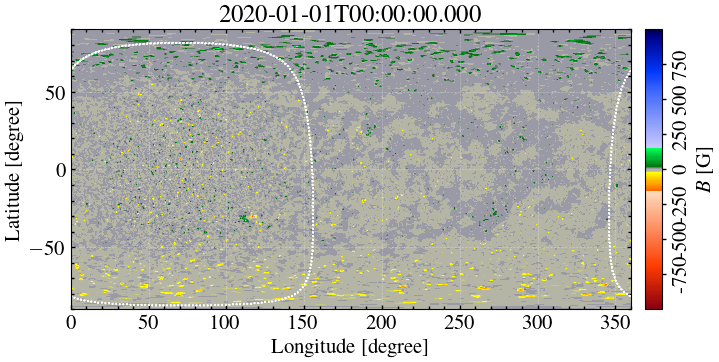

-------------------------------------------------------------------------------------


In [25]:
print(aftmap1)

                              AFTmap_20200101_0000.h5                              
-------------------------------------------------------------------------------------
                                    MAP CONTENTS                                     
-------------------------------------------------------------------------------------
AFTMAP    : Array                          - AFT Baseline Map.             
MAGMAP    : Array                          - Assimilated magnetogram in Carrington Grid.
MASK      : Array                          - Region of Data Assimilation.  
VLAT      : Array                          - Theta Component of flows at the surface.
VLON      : Array                          - Phi Component of flows at the surface.
-------------------------------------------------------------------------------------
                                        HEADER                                       
---------------------------------------------------------------------------

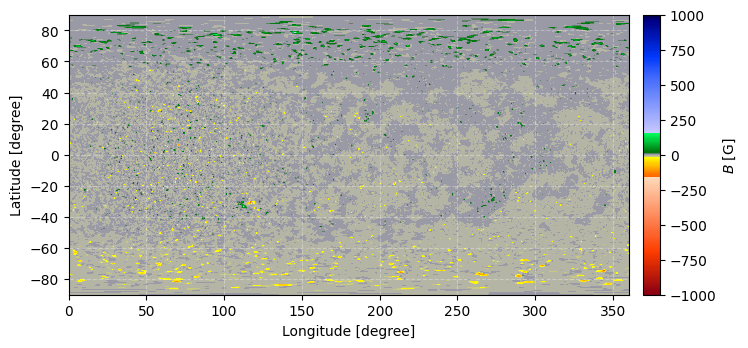

In [47]:
print(aftmap1)

In [4]:
bmap = aftmap.aftmap

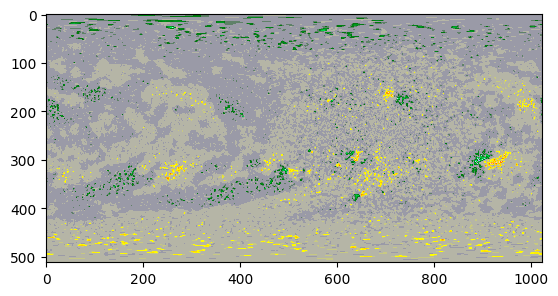

In [10]:
import matplotlib.pyplot as plt
import sunpy.visualization.colormaps
plt.imshow(bmap, vmax=1000, vmin=-1000, cmap="hmimag")

In [59]:
from astropy.io import fits

In [81]:
hdu = fits.PrimaryHDU(aftmap1.aftmap)
hdu.header.update(aftmap1.metadata)

In [83]:
hdu.writeto("~/test.fits")

In [80]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1024                                                  
NAXIS2  =                  512                                                  
EXTEND  =                    T                                                  
AFT_VER1= 'HMI_Baseline4'                                                       
AUTHOR  = 'Lisa A. Upton & Bibhuti K Jha'                                       
CAR_ROT =                 2225                                                  
CRLN_OBS=        70.8400191441                                                  
CRLNGEDG=                  0.0                                                  
CRLT_OBS=       -2.94618940353                                                  
CRROTEDG=                 22